In [20]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [21]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [22]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [23]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-40.52639050151373 -110.7840097000488
5.084216427531146 -154.84221640277914
38.566689109530216 -171.65855836389917
-44.32851830849544 -87.78976743559298
-47.84914354951813 -66.82300504663336
-36.02734382663407 -131.7927745730877
-11.80591316937651 94.29817224049015
-49.653286107114006 -159.30687422132345
-14.837361856880378 -83.91278722630878
-29.336309762053666 -23.79515698028439
-23.147378015420145 -123.55034478462926
24.364381339248183 -177.26880457175542
30.628624917107857 -27.983734945570262
21.8043096455242 -168.05345553200607
36.762409704559985 163.25157886267095
-79.81734859606247 -108.48642079956979
41.77672736192193 43.36276457152542
39.356016952930446 -113.31733221192736
-63.26679899617798 -46.42879988035932
71.10997948636717 -16.268838592532262
83.0506109283873 -33.646225901067766
-59.392854825721685 -162.61027641019535
-28.579757325444334 45.12311623310495
-1.2981455670393558 -15.803678068945516
-18.046716932468527 112.40953529026064
-17.000945257382753 81.837237747894
63.

In [24]:
from citipy import citipy

In [25]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [26]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [27]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [28]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | comodoro rivadavia
Processing Record 6 of Set 1 | bengkulu
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | hualmay
Processing Record 9 of Set 1 | vila velha
Processing Record 10 of Set 1 | ponta delgada
Processing Record 11 of Set 1 | severo-kurilsk
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | borjomi
Processing Record 14 of Set 1 | tooele
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | husavik
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | karratha
Processing Record 22 of Set 1 | hithadhoo
Processing Record 23 of Set 1 | 

Processing Record 38 of Set 4 | turtas
Processing Record 39 of Set 4 | vijayapuri
Processing Record 40 of Set 4 | samusu
City not found. Skipping...
Processing Record 41 of Set 4 | sakakah
Processing Record 42 of Set 4 | longhua
Processing Record 43 of Set 4 | ribeira grande
Processing Record 44 of Set 4 | maxixe
Processing Record 45 of Set 4 | hofn
Processing Record 46 of Set 4 | yafran
Processing Record 47 of Set 4 | coquimbo
Processing Record 48 of Set 4 | eresos
Processing Record 49 of Set 4 | chapais
Processing Record 50 of Set 4 | phangnga
Processing Record 1 of Set 5 | ozernovskiy
Processing Record 2 of Set 5 | kavieng
Processing Record 3 of Set 5 | tha mai
Processing Record 4 of Set 5 | kalmunai
Processing Record 5 of Set 5 | tasiilaq
Processing Record 6 of Set 5 | anadyr
Processing Record 7 of Set 5 | saint-georges
Processing Record 8 of Set 5 | cidreira
Processing Record 9 of Set 5 | biharamulo
Processing Record 10 of Set 5 | sao gabriel da cachoeira
Processing Record 11 of S

Processing Record 26 of Set 8 | ebolowa
Processing Record 27 of Set 8 | orotukan
Processing Record 28 of Set 8 | lavumisa
Processing Record 29 of Set 8 | komsomolskiy
Processing Record 30 of Set 8 | borskoye
Processing Record 31 of Set 8 | denpasar
Processing Record 32 of Set 8 | whitehorse
Processing Record 33 of Set 8 | odweyne
Processing Record 34 of Set 8 | hambantota
Processing Record 35 of Set 8 | aksarka
Processing Record 36 of Set 8 | myitkyina
Processing Record 37 of Set 8 | ayan
Processing Record 38 of Set 8 | naze
Processing Record 39 of Set 8 | victor harbor
Processing Record 40 of Set 8 | sao joao da barra
Processing Record 41 of Set 8 | souillac
Processing Record 42 of Set 8 | kasongo-lunda
Processing Record 43 of Set 8 | dunmore town
Processing Record 44 of Set 8 | stoyba
City not found. Skipping...
Processing Record 45 of Set 8 | zhangjiakou
Processing Record 46 of Set 8 | tondano
Processing Record 47 of Set 8 | kovernino
Processing Record 48 of Set 8 | guangyuan
Proces

Processing Record 12 of Set 12 | velsk
Processing Record 13 of Set 12 | taltal
Processing Record 14 of Set 12 | geresk
City not found. Skipping...
Processing Record 15 of Set 12 | suntar
Processing Record 16 of Set 12 | ridgecrest
Processing Record 17 of Set 12 | hami
Processing Record 18 of Set 12 | sola
Processing Record 19 of Set 12 | zaykovo
Processing Record 20 of Set 12 | tres lagoas
Processing Record 21 of Set 12 | hukuntsi
Processing Record 22 of Set 12 | ginir
Processing Record 23 of Set 12 | tairua
Processing Record 24 of Set 12 | vulcan
Processing Record 25 of Set 12 | baft
Processing Record 26 of Set 12 | karauzyak
City not found. Skipping...
Processing Record 27 of Set 12 | tando adam
Processing Record 28 of Set 12 | djambala
Processing Record 29 of Set 12 | zwedru
Processing Record 30 of Set 12 | schattdorf
Processing Record 31 of Set 12 | massakory
Processing Record 32 of Set 12 | mezen
Processing Record 33 of Set 12 | ahumada
City not found. Skipping...
Processing Recor

In [32]:
len(city_data)

547

In [33]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,72.30,66,98,12.68,PF,2022-11-19 02:52:54
1,Hilo,19.7297,-155.0900,79.25,94,22,4.88,US,2022-11-19 02:53:52
2,Kapaa,22.0752,-159.3190,79.12,79,32,4.00,US,2022-11-19 02:53:52
3,Castro,-24.7911,-50.0119,51.30,92,0,6.17,BR,2022-11-19 02:53:53
4,Comodoro Rivadavia,-45.8667,-67.5000,67.86,26,0,20.71,AR,2022-11-19 02:53:53
5,Bengkulu,-3.8004,102.2655,81.57,73,100,9.69,ID,2022-11-19 02:49:21
6,Mataura,-46.1927,168.8643,65.66,61,31,11.16,NZ,2022-11-19 02:53:53
7,Hualmay,-11.0964,-77.6139,63.84,83,98,10.16,PE,2022-11-19 02:53:54
8,Vila Velha,-20.3297,-40.2925,70.95,78,0,9.22,BR,2022-11-19 02:53:54
9,Ponta Delgada,37.7333,-25.6667,61.52,63,75,5.75,PT,2022-11-19 02:53:54


In [36]:
new_column_order = ["column0", "column7", "column8", "column1", "column2", "column3", "column4", "column5", "column6"]
city_data_df = city_data_df[new_column_order]

KeyError: "None of [Index(['column0', 'column7', 'column8', 'column1', 'column2', 'column3',\n       'column4', 'column5', 'column6'],\n      dtype='object')] are in the [columns]"

In [37]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [38]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [39]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1668832195.28648

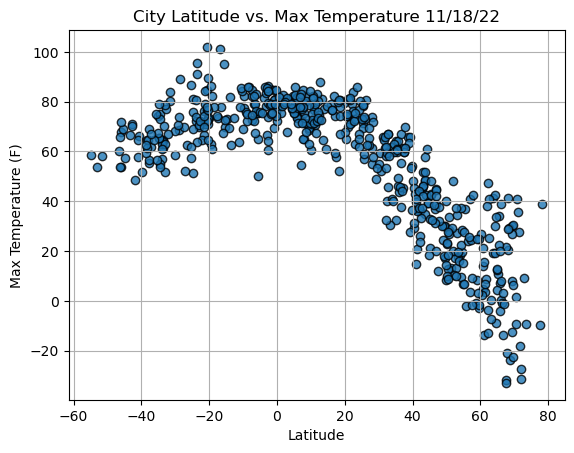

In [40]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

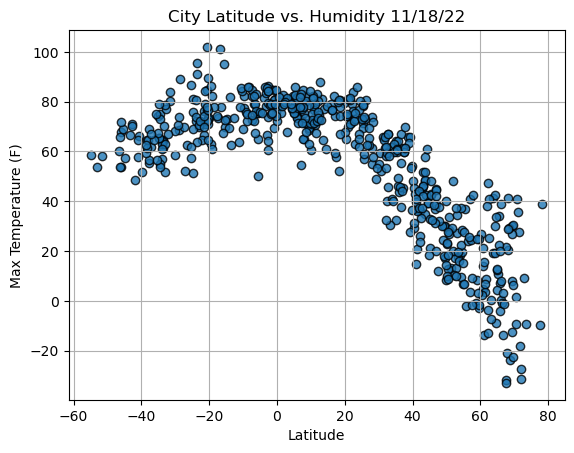

In [41]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

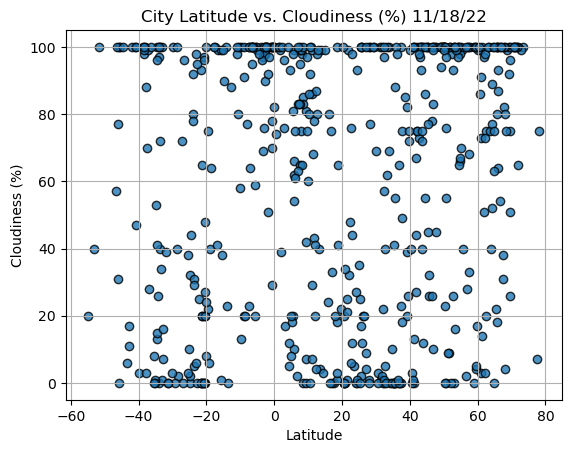

In [42]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

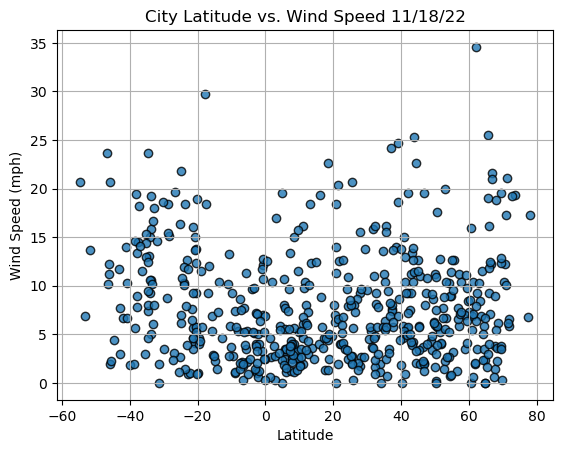

In [43]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [45]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [47]:
index13 = city_data_df.loc[13]
index13

City                       Tooele
Lat                       40.5308
Lng                     -112.2983
Max Temp                    29.12
Humidity                       63
Cloudiness                      3
Wind Speed                   5.88
Country                        US
Date          2022-11-19 02:51:56
Name: 13, dtype: object

In [48]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Hilo,19.7297,-155.0900,79.25,94,22,4.88,US,2022-11-19 02:53:52
2,Kapaa,22.0752,-159.3190,79.12,79,32,4.00,US,2022-11-19 02:53:52
9,Ponta Delgada,37.7333,-25.6667,61.52,63,75,5.75,PT,2022-11-19 02:53:54
10,Severo-Kurilsk,50.6789,156.1250,33.55,70,76,17.54,RU,2022-11-19 02:53:55
12,Borjomi,41.8527,43.4128,44.17,72,44,5.68,GE,2022-11-19 02:53:55


In [49]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

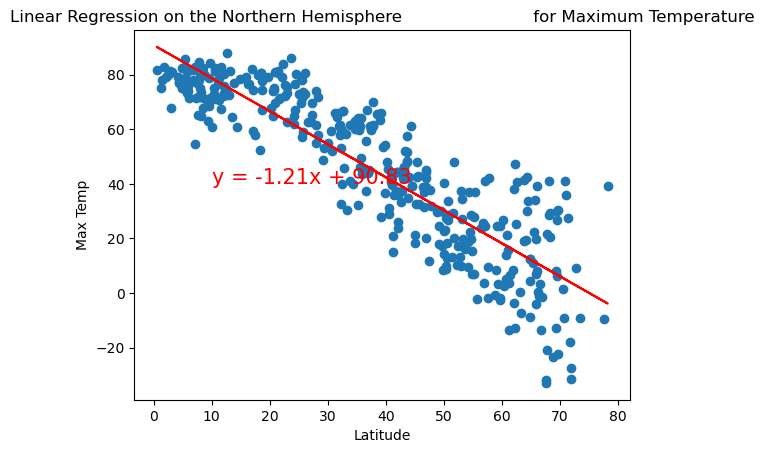

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


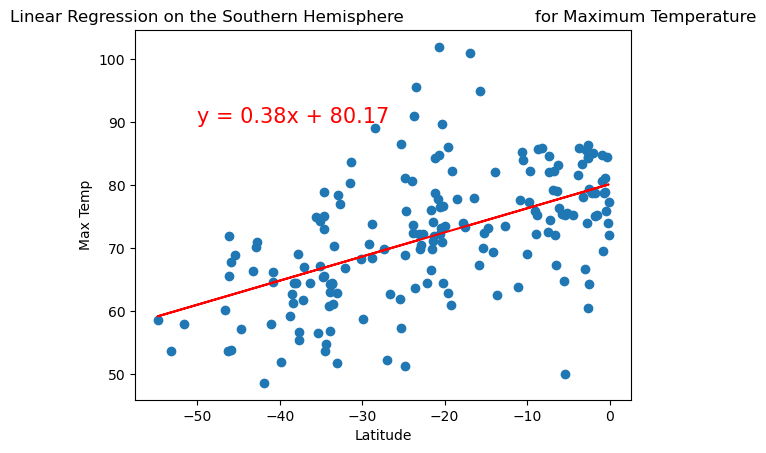

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


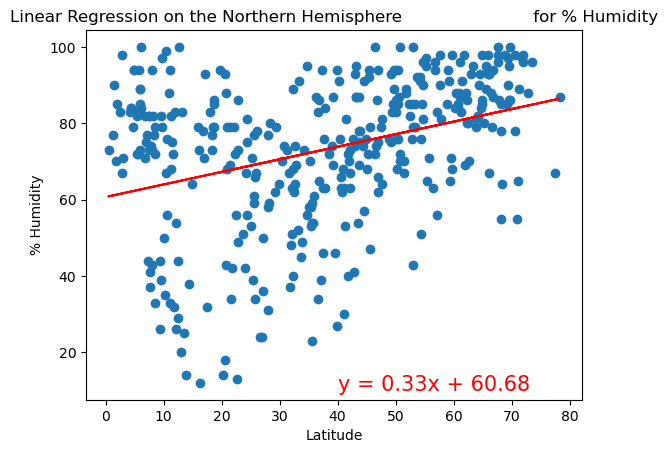

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

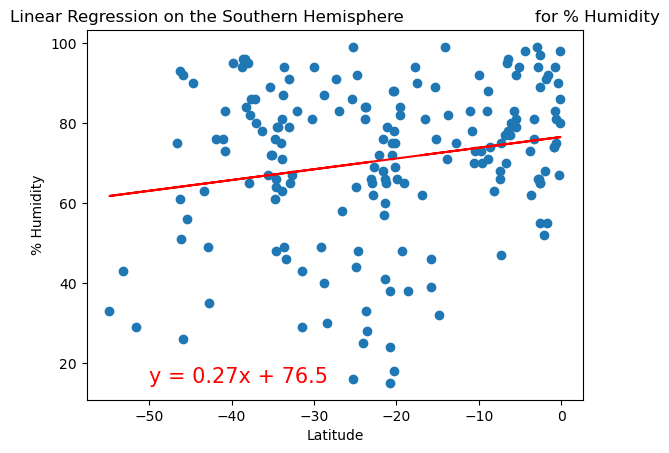

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

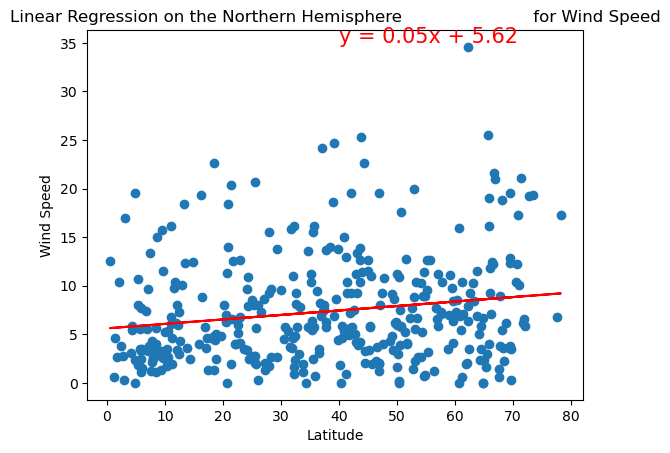

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))


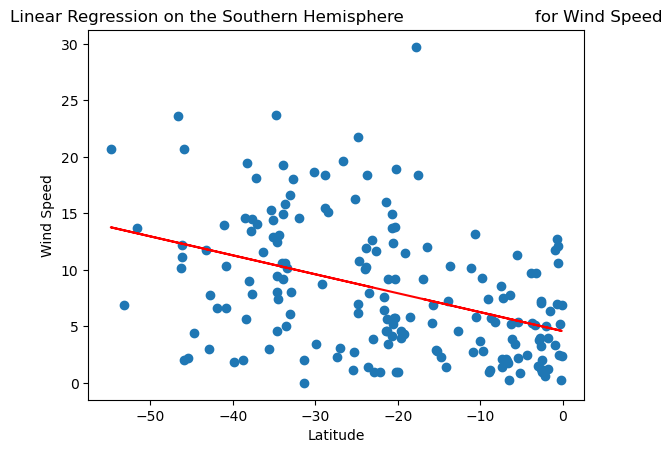

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))